# Text Analytics -EDA

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel(r"C:\Users\Dinesh\Downloads\TextAnalyticsCase (2).xlsx", sheet_name='Hotel_reviews')
df.head(5)

,Customer Review,text
0,Review 1,I travel alot and really enjoyed my stay here....
1,Review 2,Stayed one night for a seminar at the Universi...
2,Review 3,I stayed at the the BW Downtown on two separat...
3,Review 4,This is my first year to go to with a group of...
4,Review 5,I travel with several friends (we're from a sm...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  200 non-null    object
 1   text             200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [4]:
df.head()

,Customer Review,text
0,Review 1,I travel alot and really enjoyed my stay here....
1,Review 2,Stayed one night for a seminar at the Universi...
2,Review 3,I stayed at the the BW Downtown on two separat...
3,Review 4,This is my first year to go to with a group of...
4,Review 5,I travel with several friends (we're from a sm...


In [5]:
df = df.rename(columns={'Customer Review': 'Review' })

## Conducting Exploratory data analysis

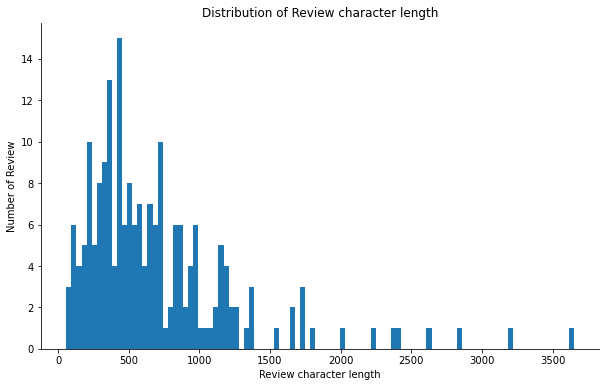

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Review character length')
plt.ylabel('Number of Review')
plt.xlabel('Review character length')
sns.despine();

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores

In [8]:
## Change the reviews type to string
df['text'] = df['text'].astype(str)

## Lowercase all reviews
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## remove punctuation
df['text']= df['text'].str.replace('[^\\w\\s]','')

# Removing numbers 
df['text']= df['text'].str.replace('\\d+', '')

<ipython-input-8-865f5065a5e6>:8: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-8-865f5065a5e6>:11: FutureWarning:

The default value of regex will change from True to False in a future version.



In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text']= df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
df['text']

0      travel alot really enjoyed stay hotel clean st...
1      stayed one night seminar university clean comf...
2      stayed bw downtown two separate business trips...
3      first year go group quilter southeast kansas i...
4      travel several friends small town girls weeken...
                             ...                        
195    try use excuse celebrate weekend hotel sorella...
196    sorella nice contemporary hotel quiet hotel tr...
197    dieses ist immer wieder eines meiner favourite...
198    schne zimmer und sind sehr gut eingerichtet se...
199    quite bit downtown youre area theres probably ...
Name: text, Length: 200, dtype: object

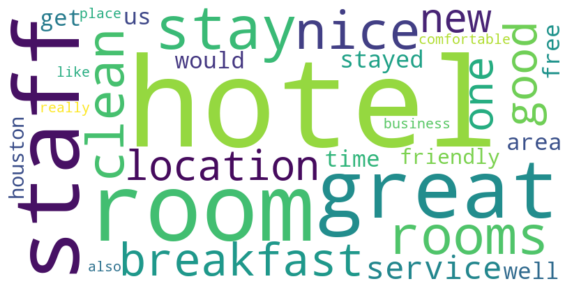

In [11]:
### Plot word cloud for the data
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:30]
freq_df = pd.DataFrame({'text':freq.index, 'count':freq.values})
data = freq_df.set_index('text').to_dict()['count']
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(data)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
#pyLDAvis.enable_notebook()

In [15]:
type(df['text'])

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



pandas.core.series.Series

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(df['text'].astype(str))
data_matrix

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<200x827 sparse matrix of type '<class 'numpy.int64'>'
	with 7163 stored elements in Compressed Sparse Row format>

In [17]:
lda_model = LatentDirichletAllocation(
n_components=5, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1 )
                                     
lda_output = lda_model.fit_transform(data_matrix)

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [18]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  66.162831
1       51.163364 -159.968018       2        1  18.466871
2      -73.144554   21.523815       3        1  11.434787
3      -66.410133 -110.606438       4        1   2.344375
4       54.417324   12.443444       5        1   1.591136, topic_info=          Term        Freq       Total Category  logprob  loglift
338      hotel  308.000000  308.000000  Default  30.0000  30.0000
469        new   59.000000   59.000000  Default  29.0000  29.0000
753        und   13.000000   13.000000  Default  28.0000  28.0000
563     really   43.000000   43.000000  Default  27.0000  27.0000
622     sherry   22.000000   22.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
507     people    0.573213   22.669519   Topic5  -5.4643   0.4632
158  courtyard    0.461658    9.070187   Topic5  -5.6807   1.1628
191       dont    0.475148   18.043229   Topic5  -5.6519   0.5038
100    central    0.456310   21.023728   Topic5  -5.6924   0.3105
6     actually    0.426089    7.612348   Topic5  -5.7609   1.2578

[297 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         4  0.660064         aber
3         1  0.957026       access
4         1  0.726108  accommodate
6         1  0.788193     actually
11        3  0.788705       afford
...     ...       ...          ...
823       2  0.141383         york
823       3  0.424150         york
823       4  0.047128         york
826       3  0.170090       zimmer
826       4  0.850452       zimmer

[484 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
### Getting the Top Words for each topic

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [20]:
vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [22]:
doc_term_matrix = vectorizer.fit_transform(df["text"].values.astype('U'))

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
doc_term_matrix.shape

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(200, 610)

In [24]:
LDA = LatentDirichletAllocation(n_components=5, random_state=35)
LDA.fit(doc_term_matrix)

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LatentDirichletAllocation(n_components=5, random_state=35)

In [25]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['park', 'bed', 'service', 'location', 'home', 'central', 'really', 'room', 'staff', 'hotel']


Top 10 words for topic #1:
['th', 'das', 'elevator', 'central', 'city', 'sehr', 'hotel', 'und', 'new', 'great']


Top 10 words for topic #2:
['nice', 'area', 'great', 'rooms', 'clean', 'good', 'staff', 'room', 'stay', 'hotel']


Top 10 words for topic #3:
['clean', 'rooms', 'carlos', 'san', 'suite', 'staff', 'great', 'breakfast', 'room', 'hotel']


Top 10 words for topic #4:
['stayed', 'bed', 'location', 'excellent', 'great', 'room', 'nice', 'staff', 'stay', 'hotel']




C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Sentiment Analysis

In [27]:
!pip install NRCLex

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43320 sha256=c199b2b271a3e1759479583241d8f28077e35e0909839340ce77583581f6397a
  Stored in directory: c:\users\dinesh\appdata\local\pip\cache\wheels\83\95\c0\42b43fb15eb48e4f5a67cba8915540cb2783591c59c037a9e5
Successfully built NRCLex


In [30]:
from nrclex import NRCLex
str_tweet = ",".join(df["text"])
text_object = NRCLex(str_tweet)

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [31]:
data = text_object.raw_emotion_scores

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [32]:
data

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'joy': 823,
 'positive': 1558,
 'trust': 875,
 'anticipation': 597,
 'anger': 130,
 'surprise': 308,
 'negative': 358,
 'sadness': 194,
 'disgust': 88,
 'fear': 109}

In [33]:
emotion_df = pd.DataFrame.from_dict(data, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
n1 = text_object.affect_frequencies

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [36]:
n1

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'fear': 0.021626984126984126,
 'anger': 0.025793650793650792,
 'anticip': 0.0,
 'trust': 0.1736111111111111,
 'surprise': 0.06111111111111111,
 'positive': 0.30912698412698414,
 'negative': 0.07103174603174603,
 'sadness': 0.038492063492063494,
 'disgust': 0.01746031746031746,
 'joy': 0.1632936507936508,
 'anticipation': 0.11845238095238095}

In [37]:
type(n1)

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dict

In [38]:
emotion_df = pd.DataFrame.from_dict(n1, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Freq'})
emotion_df = emotion_df.sort_values(by=['Emotion Freq'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Freq', y='Emotion Classification', color = 'Emotion Freq', orientation='h',color_continuous_scale='Bluered_r', width = 800, height = 400)
fig.show()

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## N-gram Implementation

In [39]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [40]:
### Text cleaning
def quick_clean(text):
  lemma = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [lemma.lemmatize(word) for word in words if word not in stopwords]

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [41]:
words = quick_clean(''.join(str(df['text'].tolist())))

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [42]:
words[:10]

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['travel',
 'alot',
 'really',
 'enjoyed',
 'stay',
 'hotel',
 'clean',
 'staff',
 'professional',
 'took']

In [43]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(front, desk)           30
(san, carlos)           30
(new, york)             30
(staff, friendly)       19
(central, park)         18
(room, clean)           17
(walking, distance)     17
(free, breakfast)       15
(hotel, staff)          15
(clean, comfortable)    13
dtype: int64

In [44]:
new_bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
new_trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]


C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [45]:
b1 = pd.DataFrame({'bigrams':new_bigrams.index, 'values':new_bigrams.values})
t1 = pd.DataFrame({'trigrams':new_trigrams.index, 'values':new_trigrams.values})

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='values', ylabel='bigrams'>

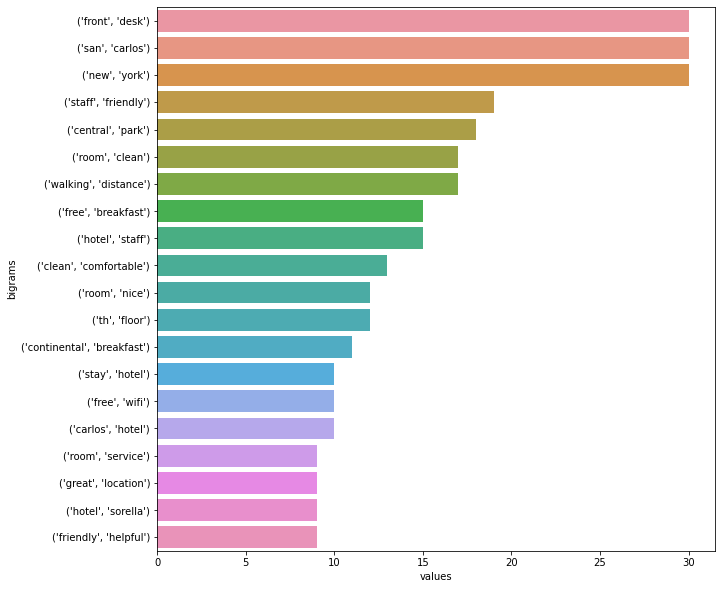

In [46]:
f, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'values',y = 'bigrams',data = b1, orient = 'h')

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:xlabel='values', ylabel='trigrams'>

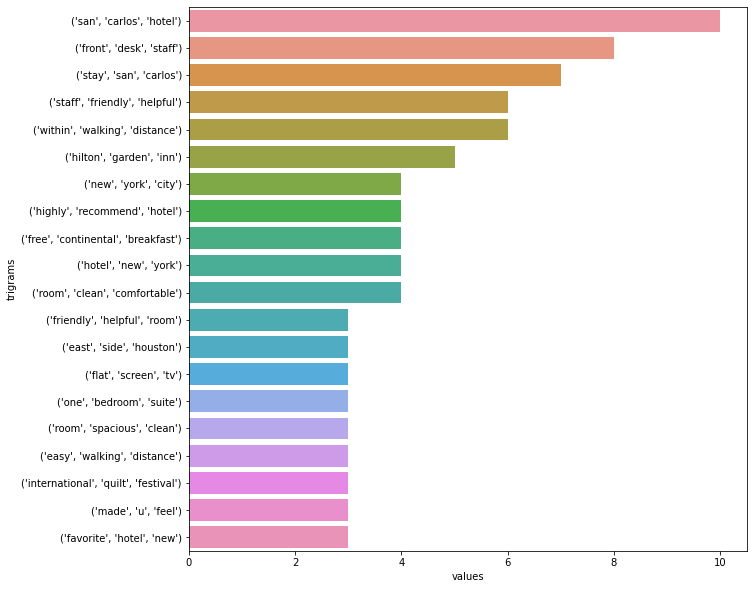

In [47]:
f, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = 'values',y = 'trigrams',data = t1, orient = 'h')

## Name Entity recognition

In [60]:
! pip install spacy
spacy.cli.download("en_core_web_sm")
import spacy
nlp = spacy.load('en_core_web_sm')

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [62]:
tokens = nlp(''.join(str(df['text'].tolist())))

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [71]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

C:\Users\Dinesh\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('one', 43),
 ('houston', 32),
 ('two', 16),
 ('first', 16),
 ('weekend', 13),
 ('second', 11),
 ('minutes', 10),
 ('evening', 9),
 ('night', 9),
 ('morning', 7),
 ('one night', 6),
 ('afternoon', 6),
 ('nyc', 4),
 ('sunday', 4),
 ('fifth', 4),
 ('days', 3),
 ('four', 3),
 ('third', 3),
 ('last minute', 3),
 ('early morning', 3)]